# Import Package

In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from operator import attrgetter
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

# Load data

In [14]:
df = pd.read_excel('data-dv-1-final.xlsx')

In [15]:
df.drop(columns = ['Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'],inplace=True)

In [16]:
df

,tanggal,customer,customer category,region,city,province,material,product category,thickness,width,length,qty,harga,total,cost
0,2017-03-01,tara,MID,WEST,KOTA PASURUAN,JAWA TIMUR,p-203,MR,0.10,300.0,2000.0,2.0,300000.0,600000.0,132000.0
1,2017-03-01,tara,MID,WEST,KOTA SURABAYA,JAWA TIMUR,p-203,MR,0.20,300.0,2000.0,2.0,310000.0,620000.0,136400.0
2,2017-03-01,tara,MID,WEST,KOTA SURABAYA,JAWA TIMUR,p-203,MR,0.30,300.0,2000.0,2.0,340000.0,680000.0,149600.0
3,2017-03-01,kamil,LARGE,CENTRAL,KOTA PALU,SULAWESI TENGAH,baja hitam,MN,1.00,200.0,1000.0,1.0,350000.0,350000.0,105000.0
4,2017-03-01,sinar surya motor,MEDIUM,WEST,KOTA PARIAMAN,SUMATERA BARAT,baja hitam,MN,1.00,200.0,200.0,1.0,125000.0,125000.0,37500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448,2020-03-12,yuli,MID,WEST,KOTA PEKANBARU,RIAU,p-203,MR,0.20,200.0,1000.0,1.0,115000.0,115000.0,25300.0
10449,2020-03-12,yuli,MID,WEST,KOTA LUBUKLINGGAU,SUMATERA SELATAN,p-203,MR,0.30,200.0,1000.0,1.0,130000.0,130000.0,28600.0
10450,2020-03-12,yuli,MID,WEST,KOTA BUKITTINGGI,SUMATERA BARAT,p-203,MR,0.50,200.0,1000.0,1.0,160000.0,160000.0,35200.0
10451,2020-03-12,talenta teknik,LARGE,WEST,KOTA SURABAYA,JAWA TIMUR,p-203,MR,1.20,55.0,270.0,16.0,75000.0,1200000.0,264000.0


# Simple EDA

We also inspected the DataFrame using df.info() to see if there are missing values. As for the analysis, due to the fact that we need to have the customer IDs but there is not customer IDS i will use customer name as an alternative. I dropped all the rows without them.

In [17]:
df.dropna(subset=['customer'], inplace=True)

We also do a very quick EDA, with a focus on the users. EDA is always a very important step of any analysis, as we discover the specifics of the dataset we are working with.

In [18]:
df.isnull().sum()

tanggal              0
customer             0
customer category    0
region               0
city                 0
province             0
material             0
product category     0
thickness            0
width                0
length               0
qty                  1
harga                1
total                1
cost                 0
dtype: int64

Because there are some columns that has missing value, my solution is we will drop rows that has at least 1 missing in its columns.  

In [19]:
df = df.dropna()

Checking if there is a dupicate data is crucial because it can make our analysis become bias. So we can do some solution, but for now we will drop duplicate rows

In [21]:
# dropping duplicate values
df.drop_duplicates(keep=False,inplace=True)

<ipython-input-21-cda2517eb044>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep=False,inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10450 entries, 0 to 10451
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal            10450 non-null  datetime64[ns]
 1   customer           10450 non-null  object        
 2   customer category  10450 non-null  object        
 3   region             10450 non-null  object        
 4   city               10450 non-null  object        
 5   province           10450 non-null  object        
 6   material           10450 non-null  object        
 7   product category   10450 non-null  object        
 8   thickness          10450 non-null  float64       
 9   width              10450 non-null  float64       
 10  length             10450 non-null  float64       
 11  qty                10450 non-null  float64       
 12  harga              10450 non-null  float64       
 13  total              10450 non-null  float64       
 14  cost  

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
thickness,10450.0,9.177245e-01,1.273610e+00,0.01,0.2,0.5,1.0,35.0
width,10450.0,1.694675e+02,1.367120e+02,0.00,58.0,130.0,300.0,3750.0
length,10450.0,7.246238e+03,7.891550e+04,1.15,400.5,1000.0,2000.0,6570000.0
qty,10450.0,4.991100e+00,2.482566e+01,1.00,1.0,1.0,3.0,1000.0
harga,10450.0,8.750839e+05,5.132448e+06,1800.00,75000.0,180000.0,440000.0,178100000.0
total,10450.0,1.312580e+06,5.492632e+06,5000.00,150000.0,360000.0,920000.0,178100000.0
cost,10450.0,3.296872e+05,1.418476e+06,1100.00,37400.0,90000.0,231000.0,53430000.0


# Cohort Analysis

The dataset we are using for this example does not contain the customer sign-up date — the date when they registered with the retailer. That is why we assume that the cohort they belong to is based on the first purchase date.

In other words, the first purchase we see in this dataset might not be the actual first purchase of a given client. However, there is no way to account for this without having access to the entire historical dataset of the retailer.

In [31]:
df = df[['customer', 'tanggal']].drop_duplicates()

we create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer). The latter one is the truncated month of the purchase date.

In [32]:
df['order_month'] = df['tanggal'].dt.to_period('M')
df['cohort'] = df.groupby('customer')['tanggal'] \
                 .transform('min') \
                 .dt.to_period('M') 

we create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer). The latter one is the truncated month of the purchase date.

In [35]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

The next step is to pivot the df_cohort table in a way that each row contains information about a given cohort and each column contains values for a certain period.

In [36]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

To obtain the retention matrix, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.



In [37]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

Lastly, we plot the retention matrix as a heatmap. Additionally, we wanted to include extra information regarding the cohort size. That is why we in fact created two heatmaps, where the one indicating the cohort size is using a white only colormap — no coloring at all.

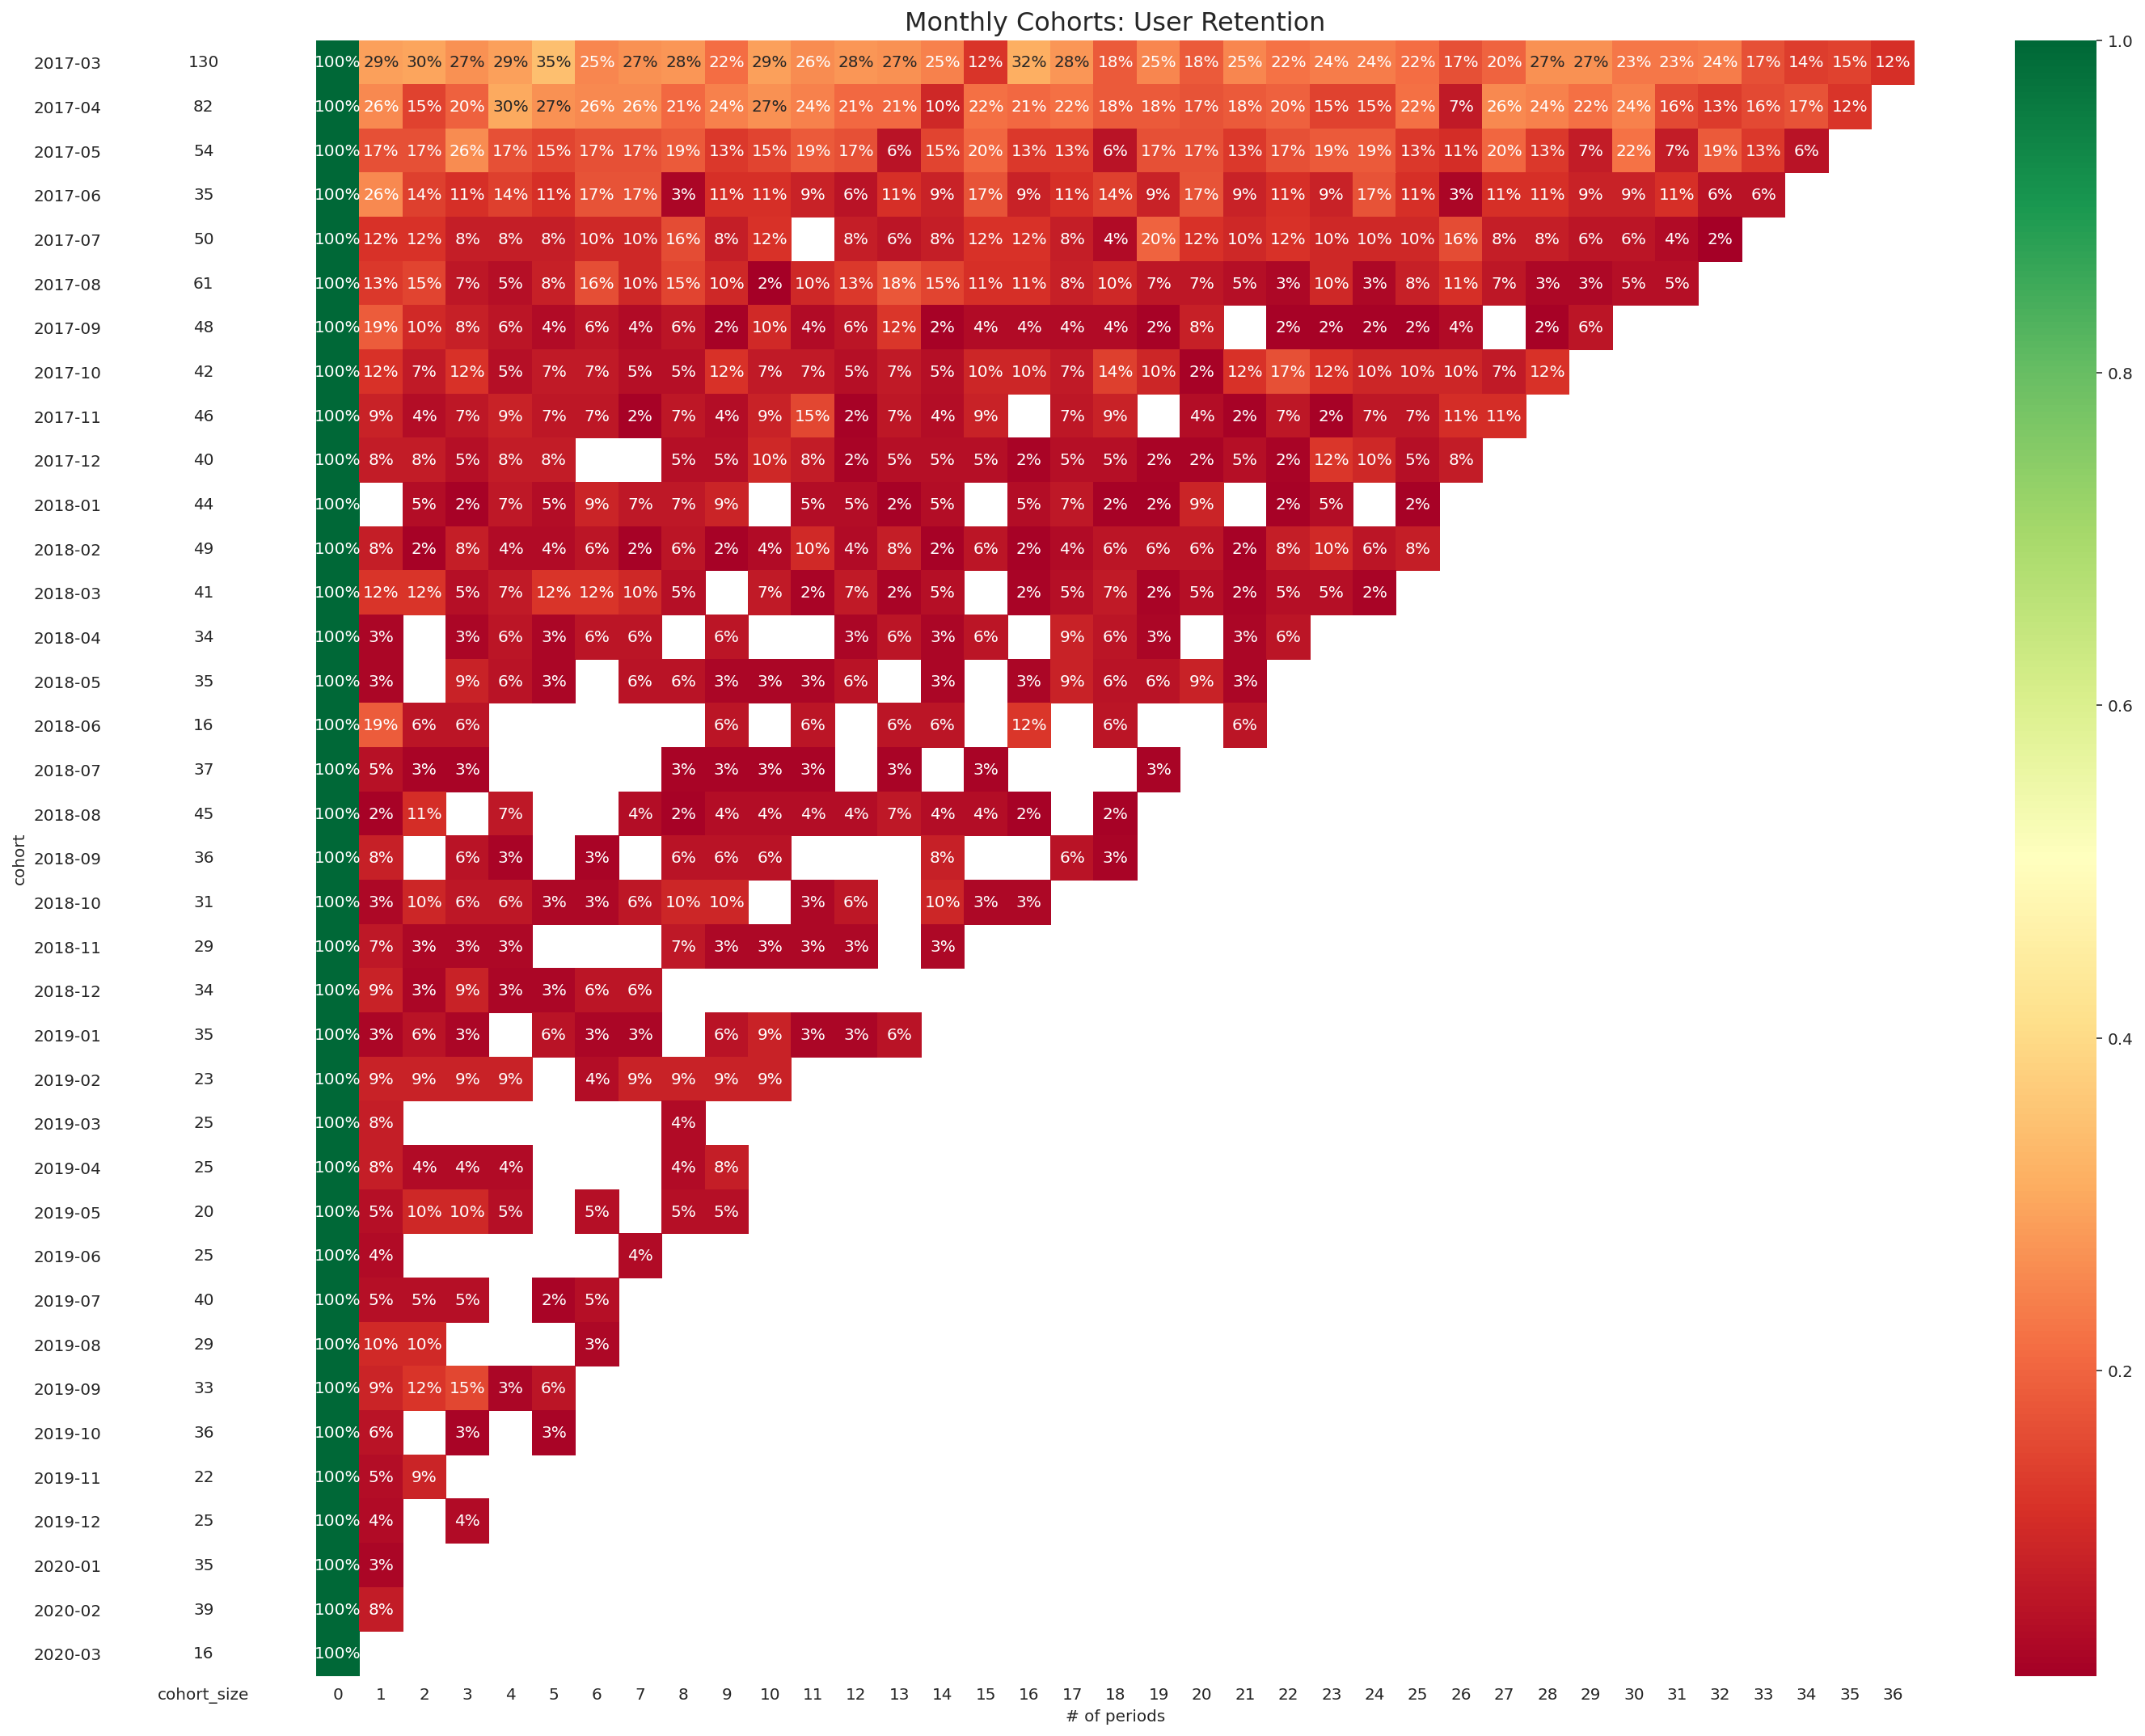

In [45]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 15), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

From the image, we can see that there is a sharp drop-off in the first month, on average more than 80% of customers do not make any purchase in the first month. The first cohort (2017–03) performs surprisingly well as compared to the other ones. This might be a cohort of dedicated customers, who first joined the platform based on some already-existing connections with the retailer. However, from data alone, that is very hard to accurately explain.

Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.